In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
gram1 = pd.read_csv("/Users/xinyangqiu/Downloads/1gram1_10000.csv",index_col=0)
gram1['train_loss'] = 100 - gram1['train_acc']
gram1['train_loss'] = gram1['train_loss']/100#
gram1['train_acc'] = gram1['train_acc']/100
gram1['val_acc'] = gram1['val_acc']/100
gram1.head()

,sen_len,emb_dim,learning_rate,epochs,train_acc,val_acc,train_loss
0,50,10,0.005,2,0.80840,0.7484,0.19160
1,50,50,0.005,2,0.86845,0.7714,0.13155
2,50,100,0.005,2,0.87645,0.7634,0.12355
3,50,150,0.005,2,0.88610,0.7744,0.11390
4,50,200,0.005,2,0.87935,0.7636,0.12065


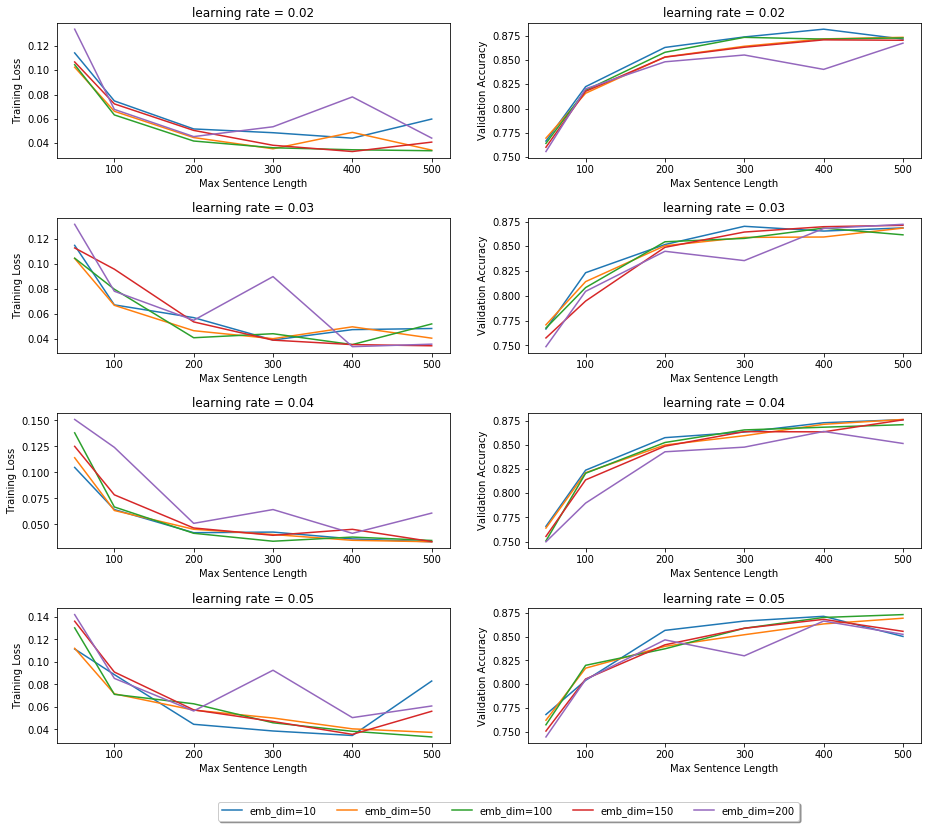

In [3]:
MAX_SENTENCE_LENGTH = [50,100,200,300,400,500]
learning_rate = [0.02,0.03,0.04,0.05]
dim = [10,50,100,150,200]
plt.figure(figsize=(12,10)) 

for i in range(len(learning_rate)):
    plt.subplot(4,2,range(1,9)[2*i])
    for j in dim: 
        ind = gram1.index[(gram1['learning_rate'] == learning_rate[i]) & (gram1['emb_dim'] == j)]
        plt.plot(gram1['sen_len'][ind],gram1['train_loss'][ind], 
             label="emb_dim=%d"%(j))   
        plt.ylabel("Training Loss")
    plt.title('learning rate = {}'.format(learning_rate[i]))
    plt.xlabel("Max Sentence Length")
    
    plt.subplot(4,2,range(1,9)[2*i+1])
    for j in dim: 
        ind = gram1.index[(gram1['learning_rate'] == learning_rate[i]) & (gram1['emb_dim'] == j)]
        plt.plot(gram1['sen_len'][ind],gram1['val_acc'][ind], 
             label="emb_dim=%d"%(j))   
        plt.ylabel("Validation Accuracy")
    plt.title('learning rate = {}'.format(learning_rate[i]))
    plt.xlabel("Max Sentence Length")
    
plt.subplots_adjust(top=1, bottom=0, left=0, right=1, hspace= 0.45, wspace=0.2)
plt.legend(loc='upper center', bbox_to_anchor=(-0.05, -0.4),
          fancybox=True, shadow=True, ncol=5)



In [17]:
ind = gram1.index[(gram1['sen_len'] == 500) & (gram1['emb_dim'] == 100) & (gram1['learning_rate'] != 0.015)]
r1_lr = gram1.iloc[ind]
r1_lr

,sen_len,emb_dim,learning_rate,epochs,train_acc,val_acc,train_loss
277,500,100,0.005,2,0.94800,0.8810,0.05200
282,500,100,0.010,2,0.96220,0.8812,0.03780
292,500,100,0.020,2,0.96630,0.8728,0.03370
297,500,100,0.025,2,0.96615,0.8688,0.03385
302,500,100,0.030,2,0.94775,0.8616,0.05225
307,500,100,0.035,2,0.96785,0.8726,0.03215
312,500,100,0.040,2,0.96540,0.8708,0.03460
317,500,100,0.045,2,0.96595,0.8748,0.03405
322,500,100,0.050,2,0.96670,0.8732,0.03330
327,500,100,0.100,2,0.94570,0.8572,0.05430


In [70]:
r2_lr = pd.read_csv("/Users/xinyangqiu/Downloads/r2_lr.csv",index_col=0)
r2_lr.loc[0] = [25000,100,0.005,2,92.845,85.96]
r2_lr.loc[9] = [25000,100,0.025,2,92.85,83.28]
r2_lr['train_acc'] = r2_lr['train_acc']/100
r2_lr['train_loss'] =1 - r2_lr['train_acc']
r2_lr['val_acc'] = r2_lr['val_acc']/100
r2_lr=r2_lr.sort_values(by=['learning_rate'])
r3_lr = pd.read_csv("/Users/xinyangqiu/Downloads/r3_lr.csv",index_col=0)
r3_lr.loc[0] = [25000,100,0.005,2,85.505,79.38]
r3_lr.loc[9] = [25000,100,0.025,2,91.121,79.28]
r3_lr['train_acc'] = r3_lr['train_acc']/100
r3_lr['train_loss'] =1 - r3_lr['train_acc']
r3_lr['val_acc'] = r3_lr['val_acc']/100
r3_lr = r3_lr.sort_values(by=['learning_rate'])
r4_lr = pd.read_csv("/Users/xinyangqiu/Downloads/r4_lr.csv",index_col=0)
r4_lr.loc[0] = [25000,100,0.005,2,83.015,74.94]
r4_lr.loc[9] = [25000,100,0.025,2,85.735,74.02]
r4_lr['train_acc'] = r4_lr['train_acc']/100
r4_lr['train_loss'] =1 - r4_lr['train_acc']
r4_lr['val_acc'] = r4_lr['val_acc']/100
r4_lr = r4_lr.sort_values(by=['learning_rate'])
r_lr = pd.concat([r1_lr,r2_lr,r3_lr,r4_lr])
r_lr.index = range(0,40)

In [75]:
r_lr

,sen_len,emb_dim,learning_rate,epochs,train_acc,val_acc,train_loss
0,500.0,100.0,0.005,2.0,0.94800,0.8810,0.05200
1,500.0,100.0,0.010,2.0,0.96220,0.8812,0.03780
2,500.0,100.0,0.020,2.0,0.96630,0.8728,0.03370
3,500.0,100.0,0.025,2.0,0.96615,0.8688,0.03385
4,500.0,100.0,0.030,2.0,0.94775,0.8616,0.05225
5,500.0,100.0,0.035,2.0,0.96785,0.8726,0.03215
6,500.0,100.0,0.040,2.0,0.96540,0.8708,0.03460
7,500.0,100.0,0.045,2.0,0.96595,0.8748,0.03405
8,500.0,100.0,0.050,2.0,0.96670,0.8732,0.03330
9,500.0,100.0,0.100,2.0,0.94570,0.8572,0.05430


Text(0.5,0,'Learning_Rate')

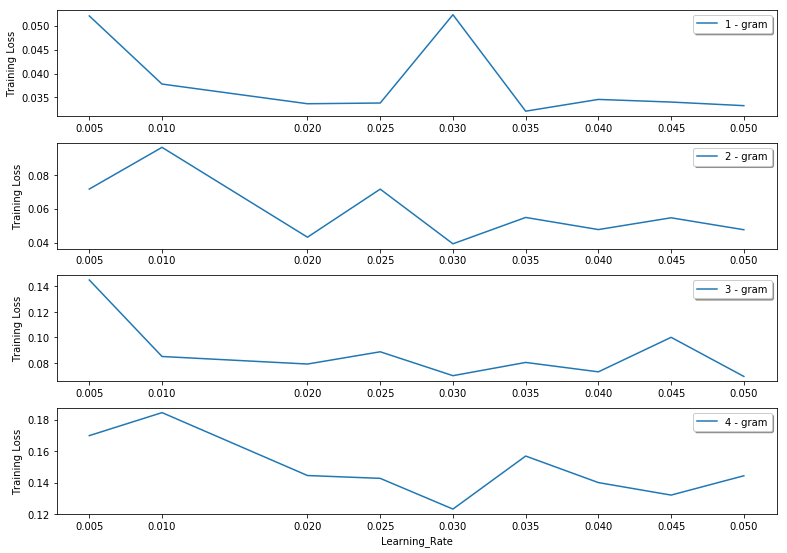

In [73]:
plt.figure(figsize=(10,7)) 
for i in range(4):
    plt.subplot(4,1,range(1,5)[i])
    plt.plot(r_lr['learning_rate'][10*i:(10*i+9)],r_lr['train_loss'][10*i:(10*i+9)], label='%d - gram'%(i+1))   
    plt.xticks(r_lr['learning_rate'][10*i:(10*i+9)])#,rotation=45)  
    plt.legend(loc='upper right',fancybox=True, shadow=True, ncol=5)
    plt.ylabel("Training Loss")
plt.subplots_adjust(top=1, bottom=0, left=0, right=1, hspace= 0.25 ,wspace=0.05)
plt.xlabel("Learning_Rate")

/Users/xinyangqiu/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: The set_color_cycle attribute was deprecated in version 1.5. Use set_prop_cycle instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


Text(0.5,0,'Learning_Rate')

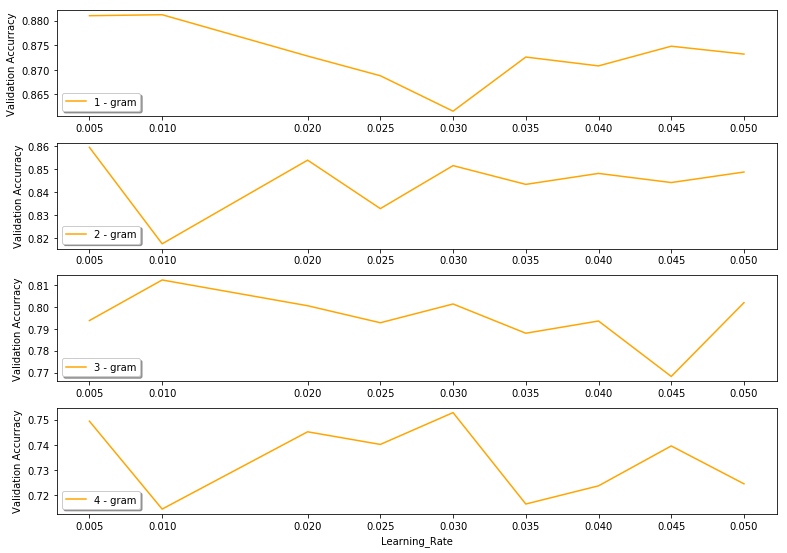

In [74]:
plt.figure(figsize=(10,7)) 
for i in range(4):
    plt.subplot(4,1,range(1,5)[i])
    plt.gca().set_color_cycle(['orange'])
    plt.plot(r_lr['learning_rate'][10*i:(10*i+9)],r_lr['val_acc'][10*i:(10*i+9)], label='%d - gram'%(i+1))   
    plt.xticks(r_lr['learning_rate'][10*i:(10*i+9)])#,rotation=45)  
    plt.legend(loc='lower left',fancybox=True, shadow=True, ncol=5)
    plt.ylabel("Validation Accurracy")
plt.subplots_adjust(top=1, bottom=0, left=0, right=1, hspace= 0.25 ,wspace=0.05)

plt.xlabel("Learning_Rate")

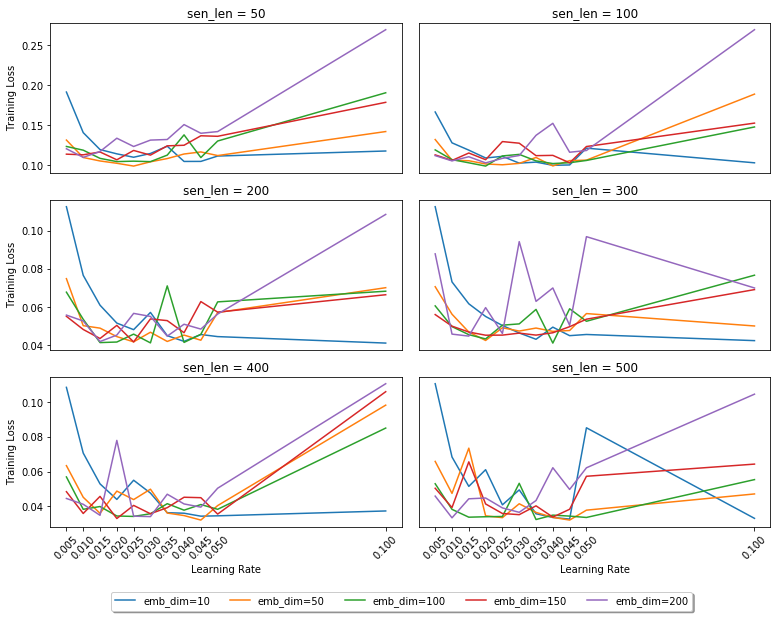

In [7]:
MAX_SENTENCE_LENGTH = [50,100,200,300,400,500]
learning_rate = [0.005,0.01,0.015,0.02,0.025,0.03,0.035,0.04,0.045,0.05,0.1]
dim = [10,50,100,150,200]
plt.figure(figsize=(10,7)) 

for i in range(len(MAX_SENTENCE_LENGTH)):
    plt.subplot(3,2,range(1,7)[i])
    for j in dim: 
        ind = gram1.index[(gram1['sen_len'] == MAX_SENTENCE_LENGTH[i]) & (gram1['emb_dim'] == j)]
        plt.plot(gram1['learning_rate'][ind],gram1['train_loss'][ind], 
             label="emb_dim=%d"%(j))   
    plt.title('sen_len = %d'%(MAX_SENTENCE_LENGTH[i]))
    if i == 4 or i == 5:
        plt.xticks(learning_rate,rotation=45)
        plt.xlabel("Learning Rate")
    else:
        plt.xticks([])
    if i == 0 or i == 2 or i == 4:
        plt.ylabel("Training Loss")
    else:
        plt.yticks([])
        
plt.subplots_adjust(top=1, bottom=0, left=0, right=1, hspace= 0.18 ,wspace=0.05)
plt.legend(loc='upper center', bbox_to_anchor=(-0.05, -0.4),
          fancybox=True, shadow=True, ncol=5)

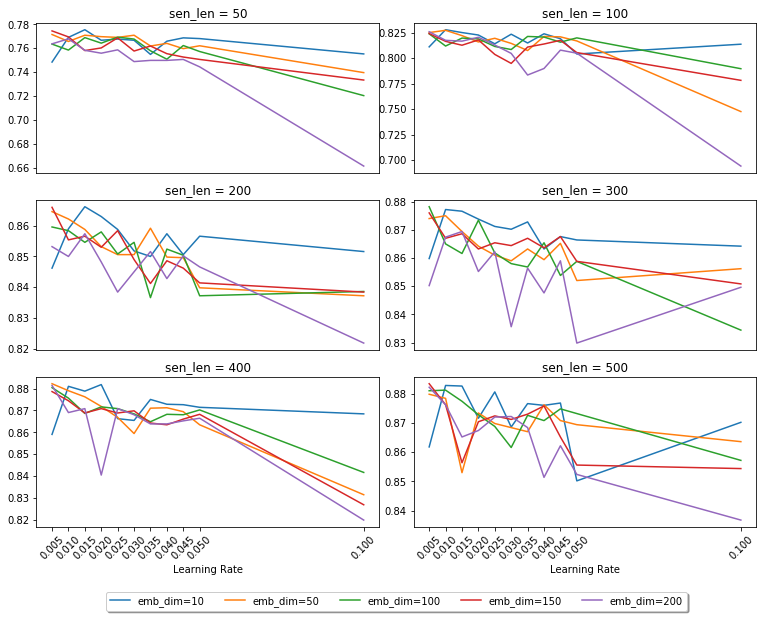

In [8]:
plt.figure(figsize=(10,7)) 
for i in range(len(MAX_SENTENCE_LENGTH)):
    plt.subplot(3,2,range(1,7)[i])
    for j in dim: 
        ind = gram1.index[(gram1['sen_len'] == MAX_SENTENCE_LENGTH[i]) & (gram1['emb_dim'] == j)]
        plt.plot(gram1['learning_rate'][ind],gram1['val_acc'][ind], 
             label="emb_dim=%d"%(j))   
    plt.title('sen_len = %d'%(MAX_SENTENCE_LENGTH[i]))
    if i == 4 or i == 5:
        plt.xticks(learning_rate,rotation=45)
        plt.xlabel("Learning Rate")
    else:
        plt.xticks([])
plt.subplots_adjust(top=1, bottom=0, left=0, right=1, hspace= 0.18 ,wspace=0.1)
plt.legend(loc='upper center', bbox_to_anchor=(-0.05, -0.4),
          fancybox=True, shadow=True, ncol=5)